In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


In [2]:
from finches import Mpipi_frontend, CALVADOS_frontend
from sparrow import Protein
import metapredict as meta

In [3]:
mf = Mpipi_frontend()
cf = CALVADOS_frontend()




/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


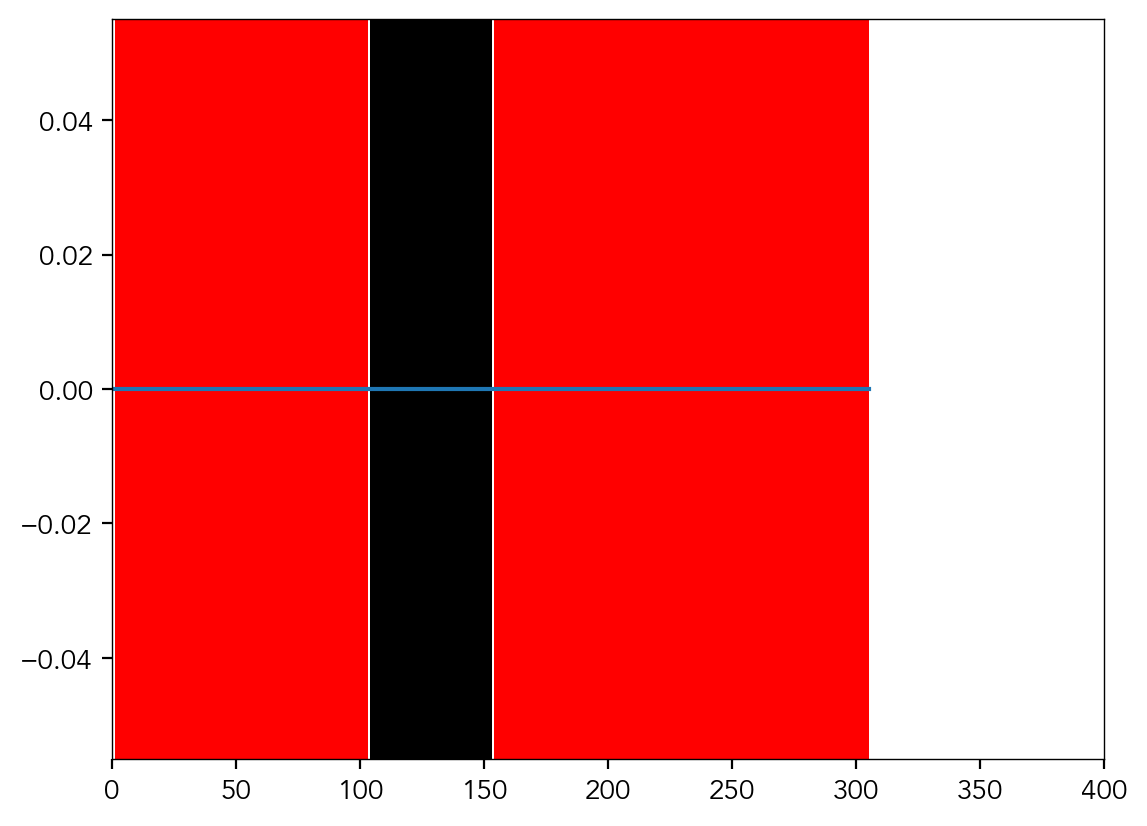

In [4]:
#nanog domain architectur 
plt.plot([1,305],[0,0])
ax = plt.gca()
ax.axvspan(1,103,lw=0, color='r')
ax.axvspan(104,153,lw=0,color='k')
ax.axvspan(154,305,lw=0, color='r')
plt.xlim([0,400])
plt.savefig('out_figures/nanog_domain_arch.pdf')

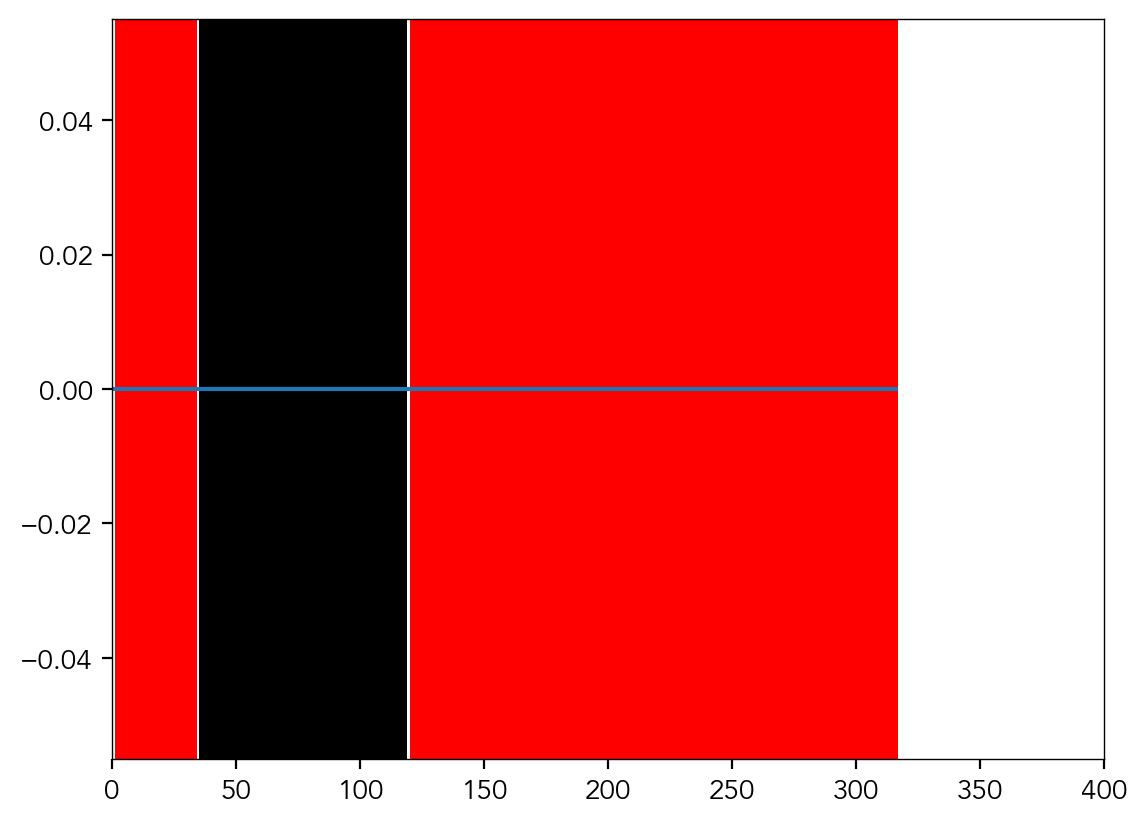

In [5]:
#sox2 domain architecture 
plt.plot([1,316],[0,0])
ax = plt.gca()
ax.axvspan(1,34,lw=0, color='r')
ax.axvspan(35,119,lw=0,color='k')
ax.axvspan(120,317,lw=0, color='r')
plt.xlim([0,400])
plt.savefig('out_figures/sox2_domain_arch.pdf')


In [6]:
# fd 104-153
# 153-end (305)
nanog= 'WQKNNWPKNSNGVTQKASAPTYPSLYSSYHQGCLVNPTGNLPMWSNQTWNNSTWSNQTQNIQSWSNHSWNTQTWCTQSWNNQAWNSPFYNCGEESLQSCMQFQPNSPASDLEAALEAAGEGLNVIQQTTRYFSTPQTMDLFLNYSMNMQPEDV'

#120-end (317
sox2 = 'MKKDKYTLPGGLLAPGGNSMASGVGVGAGLGAGVNQRMDSYAHMNGWSNGSYSMMQDQLGYPQHPGLNAHGAAQMQPMHRYDVSALQYNSMTSSQTYMNGSPTYSMSYSQQGTPGMALGSMGSVVKSEASSSPPVVTSSSHSRAPCQAGDLRDMISMYLPGAEVPEPAAPSRLHMSQHYQSGPVPGTAINGTLPLSHM'

nanog_offset = 153
sox2_offset = 120

for i in [16,36,56,76,96,116,136]:
    print(i+nanog_offset)

print('')
for i in [16,36,56,76,97,116,136, 156, 176]:
    print(i+sox2_offset)



169
189
209
229
249
269
289

136
156
176
196
217
236
256
276
296


(<Figure size 2975x2975 with 4 Axes>,
 <Axes: >,
 <Axes: >,
 <Axes: >,
 <Axes: >)

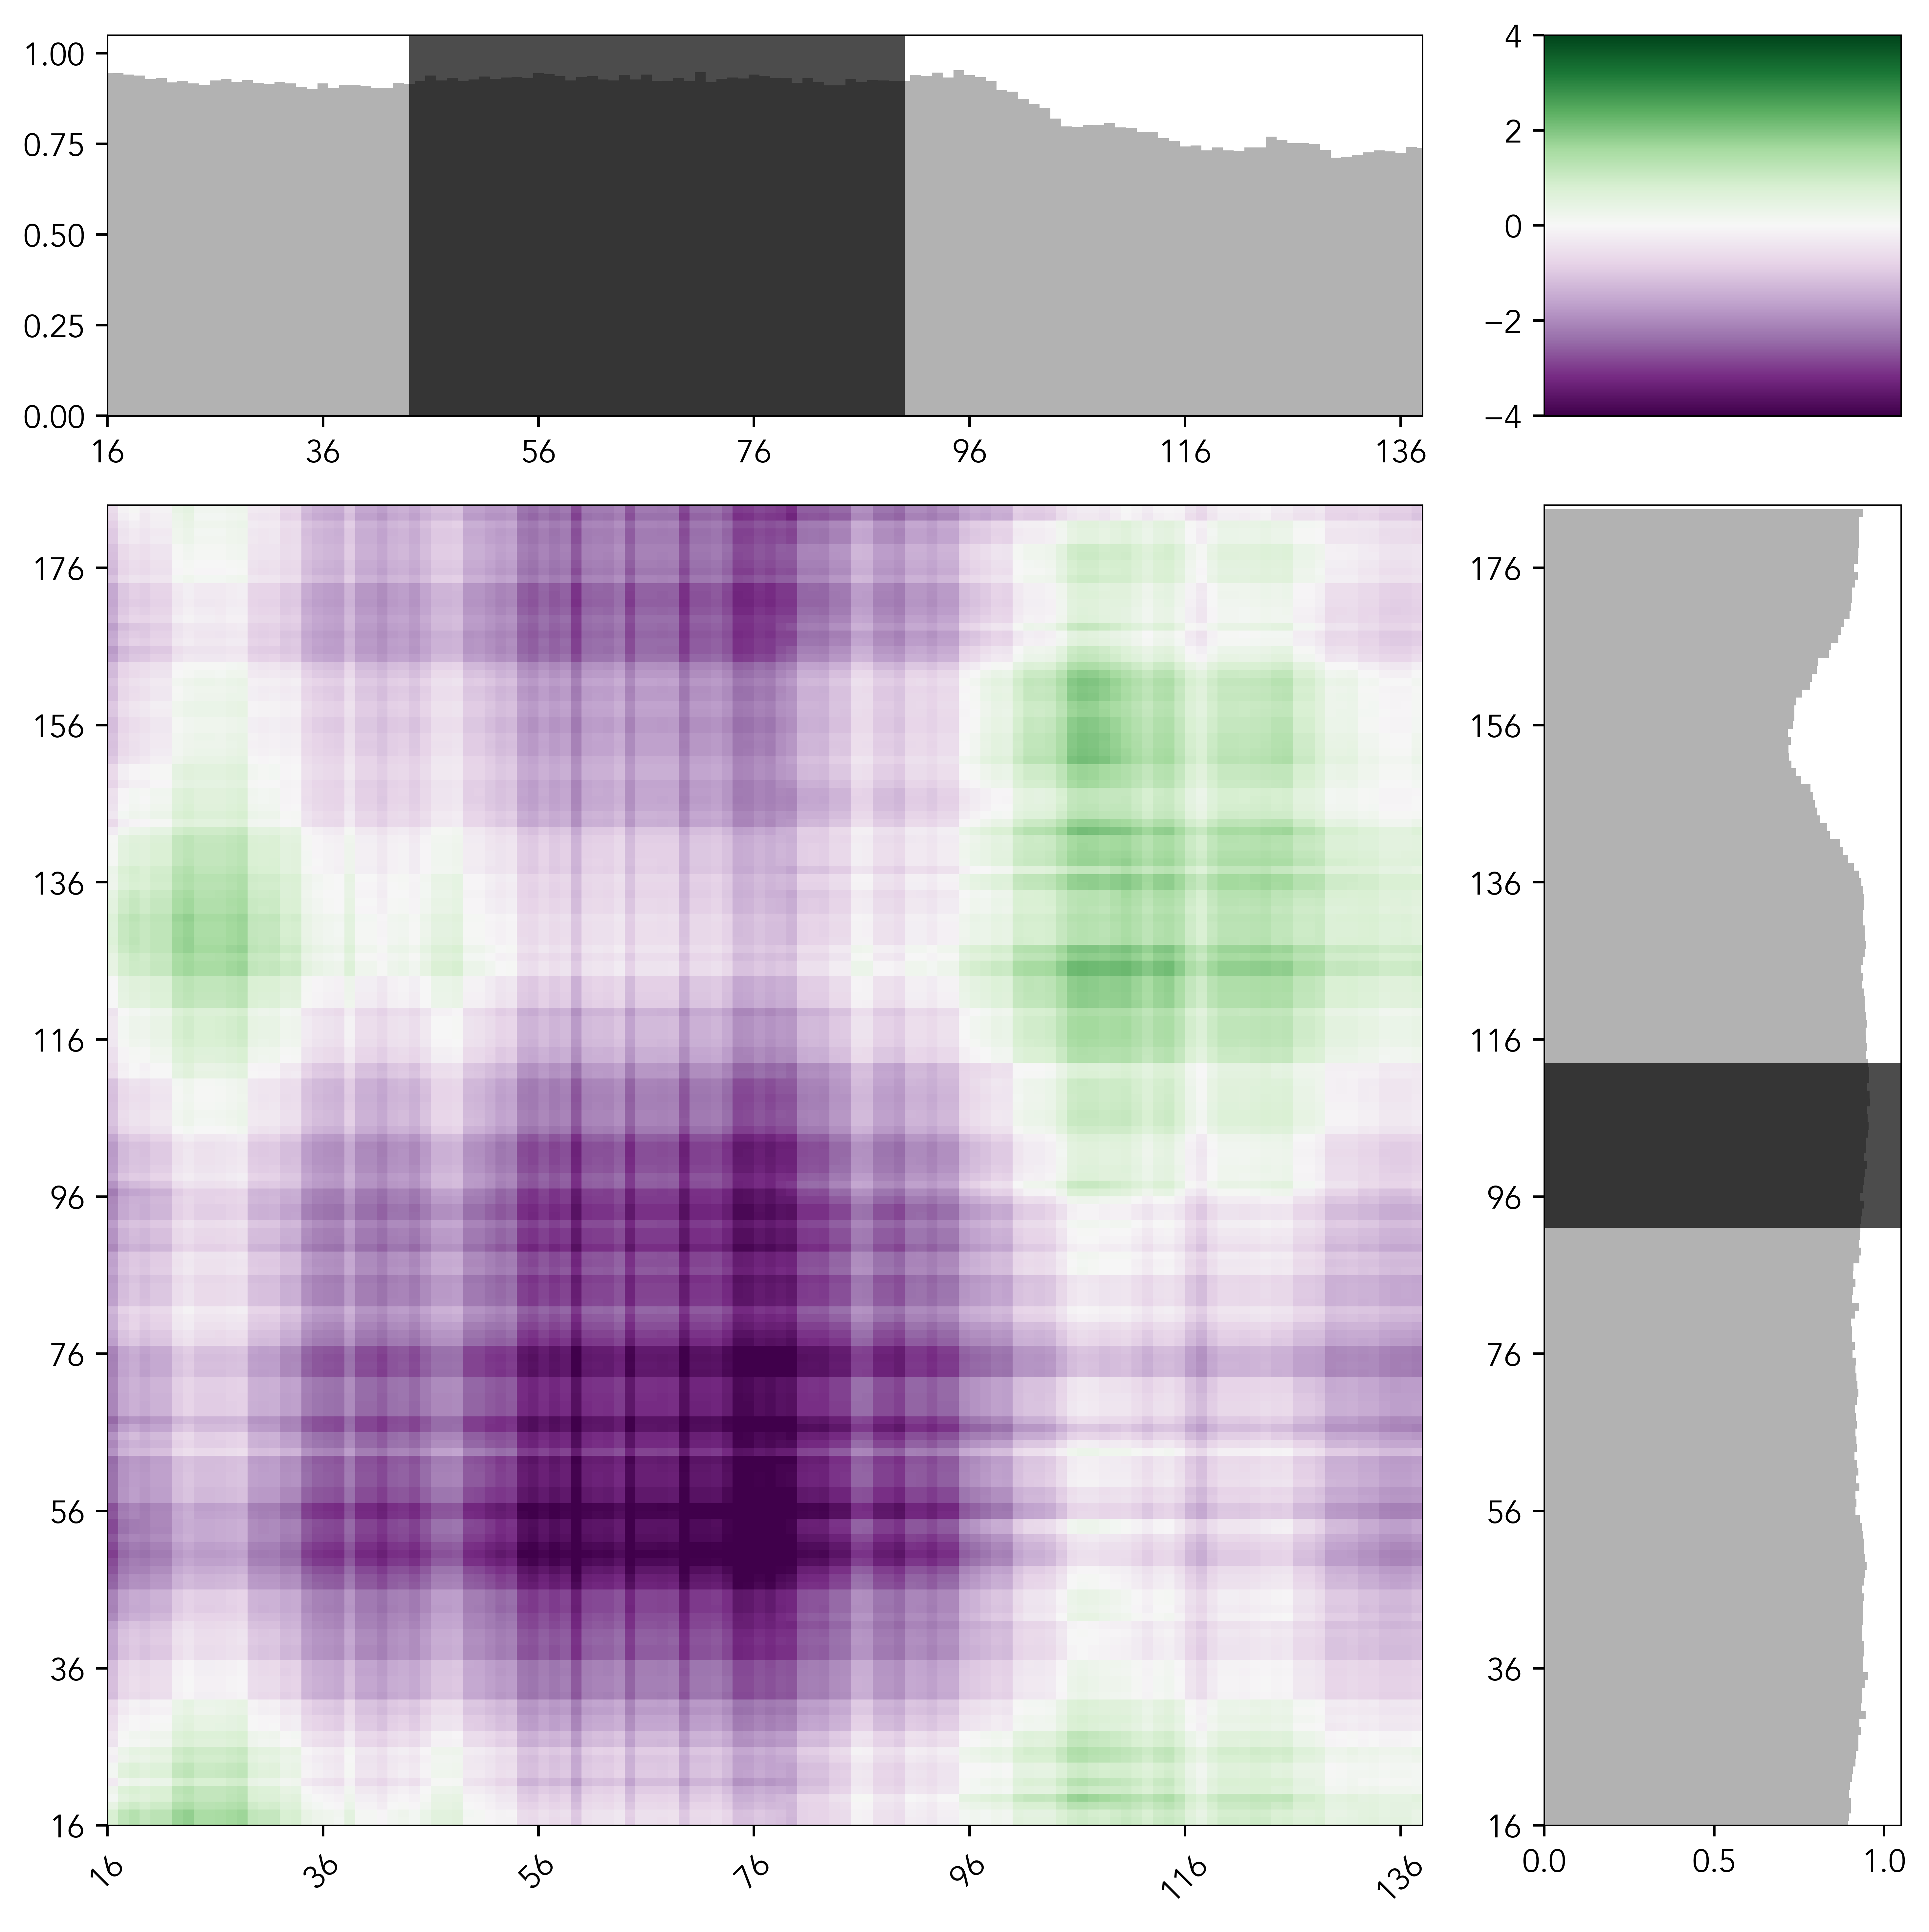

In [7]:
mf.interaction_figure(nanog,sox2, seq1_domains=[[197-nanog_offset, 243-nanog_offset]], seq2_domains=[[212-sox2_offset, 233-sox2_offset]], tic_frequency=20, vmax=4, vmin=-4, fname='out_figures/nanog_sox2_with_interaction_domains.pdf')



IDR: 1-103
IDR: 152-305


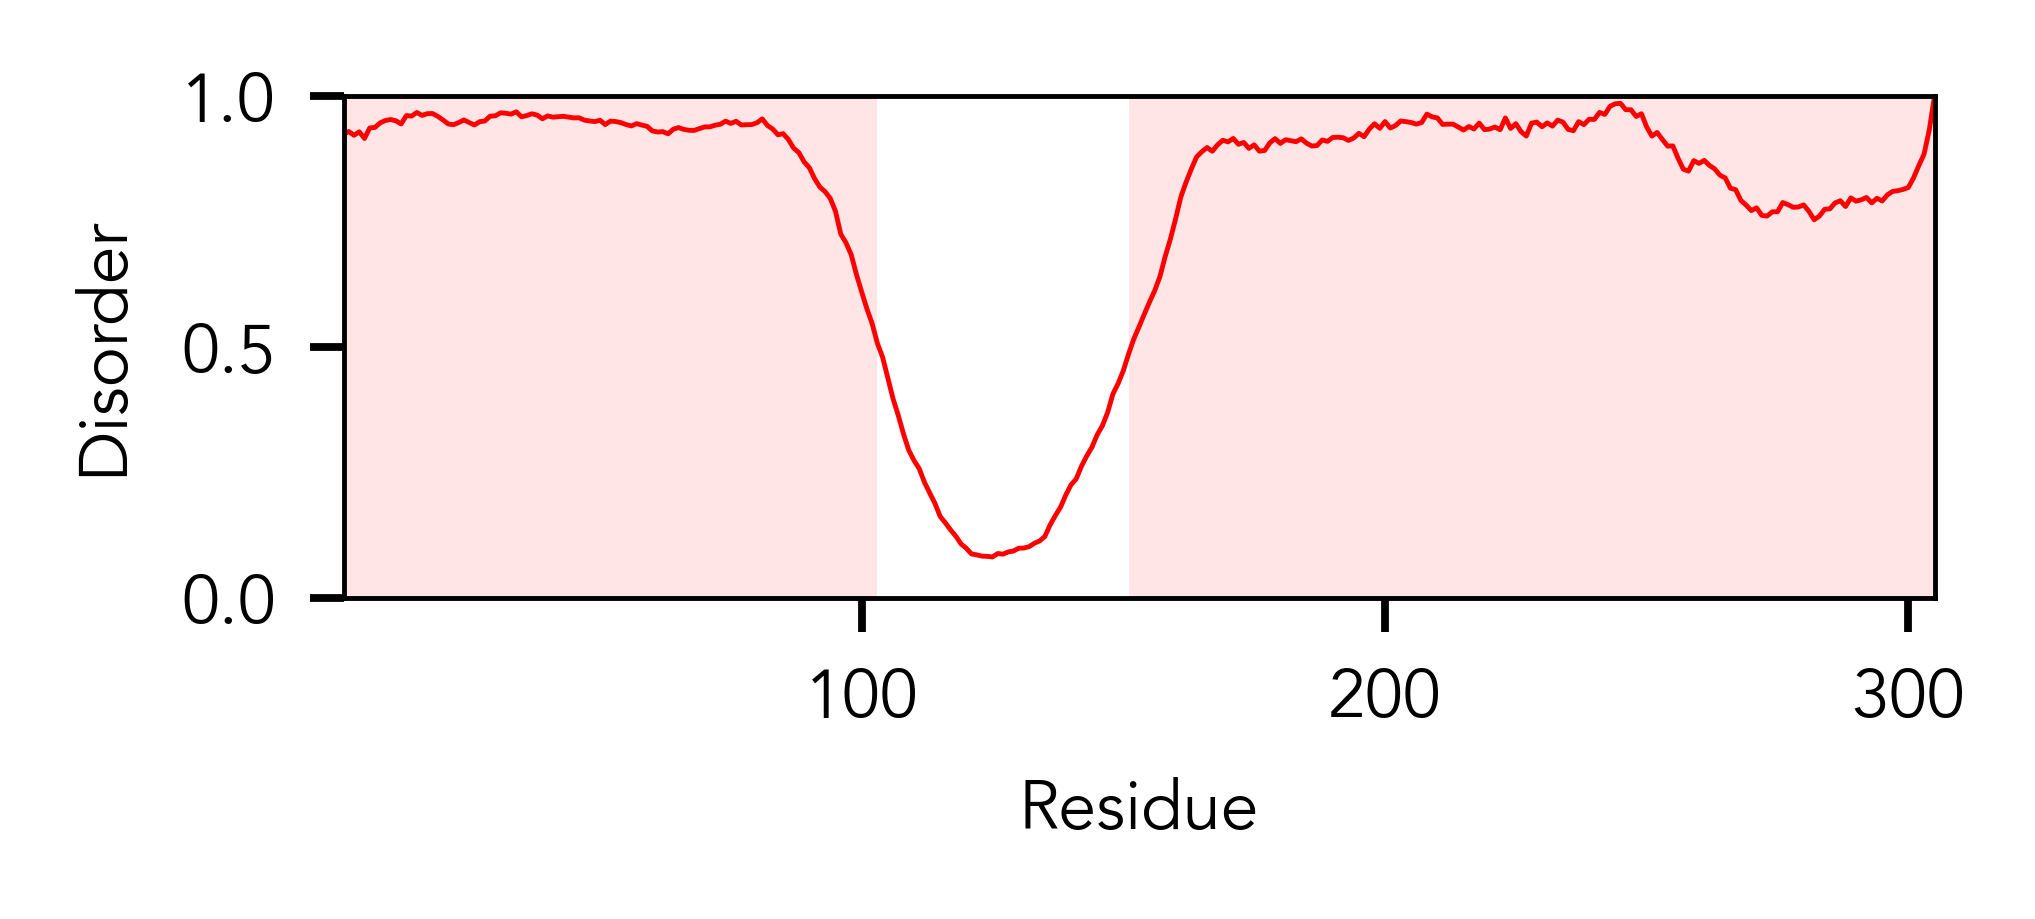

In [13]:
figure(None, (3,1.4), dpi=350)
ax = plt.gca()

# nanog full length
seq = 'MSVDPACPQSLPCFEASDCKESSPMPVICGPEENYPSLQMSSAEMPHTETVSPLPSSMDLLIQDSPDSSTSPKGKQPTSAEKSVAKKEDKVPVKKQKTRTVFSSTQLCVLNDRFQRQKYLSLQQMQELSNILNLSYKQVKTWFQNQRMKSKRWQKNNWPKNSNGVTQKASAPTYPSLYSSYHQGCLVNPTGNLPMWSNQTWNNSTWSNQTQNIQSWSNHSWNTQTWCTQSWNNQAWNSPFYNCGEESLQSCMQFQPNSPASDLEAALEAAGEGLNVIQQTTRYFSTPQTMDLFLNYSMNMQPEDV'
idx = np.arange(1,len(seq)+1)
plt.plot(idx, meta.predict_disorder(seq), color='r', lw=0.5)
doms = meta.predict_disorder_domains(seq)
for d in doms.disordered_domain_boundaries:
    print(f"IDR: {d[0]+1}-{d[1]}")
    ax.axvspan(d[0],d[1],lw=0, color='r', alpha=0.1)

#ax.axvspan(607,709,color='b',lw=0,alpha=0.4)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Residue',fontsize=7)
plt.ylabel('Disorder',fontsize=7)
plt.ylim([0,1])
plt.xlim([1,idx[-1]])
plt.tight_layout()
plt.savefig('out_figures/disorder_nanog.pdf')

IDR: 1-49
IDR: 114-317


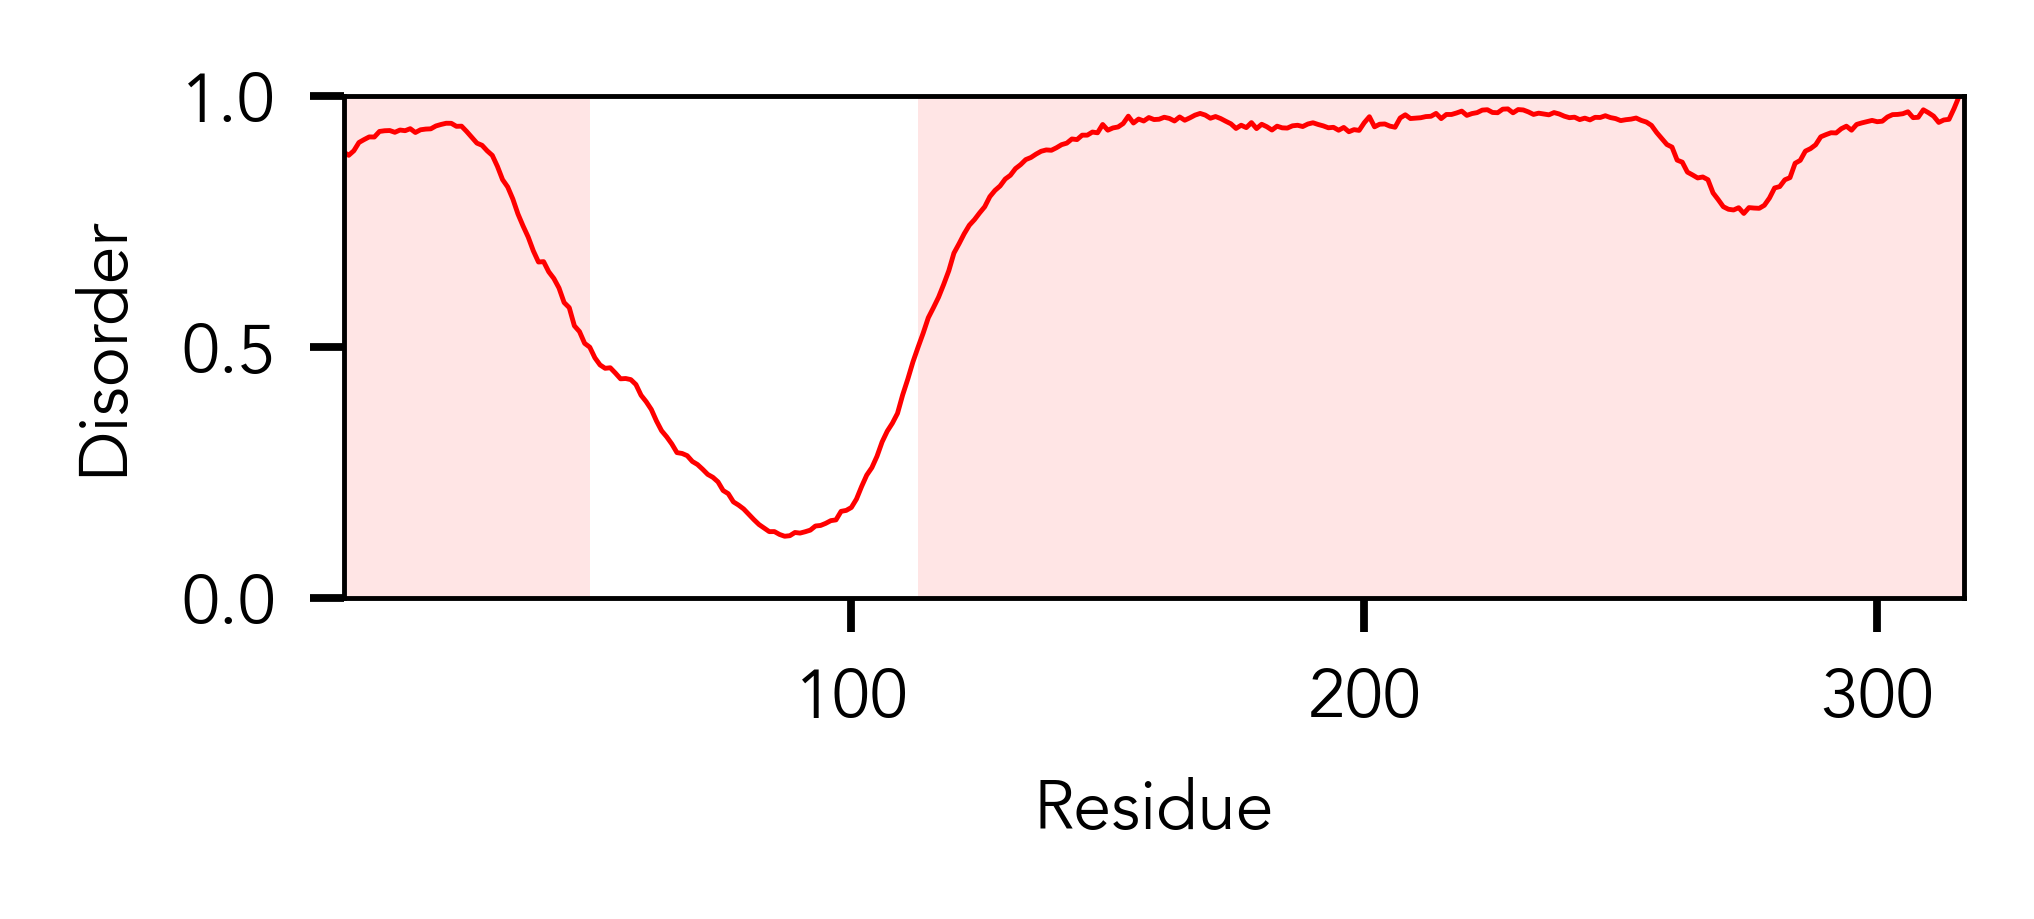

In [12]:

figure(None, (3,1.4), dpi=350)
ax = plt.gca()

# sox2 full length
seq = 'MYNMMETELKPPGPQQTSGGGGGNSTAAAAGGNQKNSPDRVKRPMNAFMVWSRGQRRKMAQENPKMHNSEISKRLGAEWKLLSETEKRPFIDEAKRLRALHMKEHPDYKYRPRRKTKTLMKKDKYTLPGGLLAPGGNSMASGVGVGAGLGAGVNQRMDSYAHMNGWSNGSYSMMQDQLGYPQHPGLNAHGAAQMQPMHRYDVSALQYNSMTSSQTYMNGSPTYSMSYSQQGTPGMALGSMGSVVKSEASSSPPVVTSSSHSRAPCQAGDLRDMISMYLPGAEVPEPAAPSRLHMSQHYQSGPVPGTAINGTLPLSHM'
idx = np.arange(1,len(seq)+1)
plt.plot(idx, meta.predict_disorder(seq), color='r', lw=0.5)
doms = meta.predict_disorder_domains(seq)
for d in doms.disordered_domain_boundaries:
    print(f"IDR: {d[0]+1}-{d[1]}")
    ax.axvspan(d[0],d[1],lw=0, color='r', alpha=0.1)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Residue',fontsize=7)
plt.ylabel('Disorder',fontsize=7)
plt.ylim([0,1])
plt.xlim([1,idx[-1]])
plt.tight_layout()
plt.savefig('out_figures/disorder_sox2.pdf')

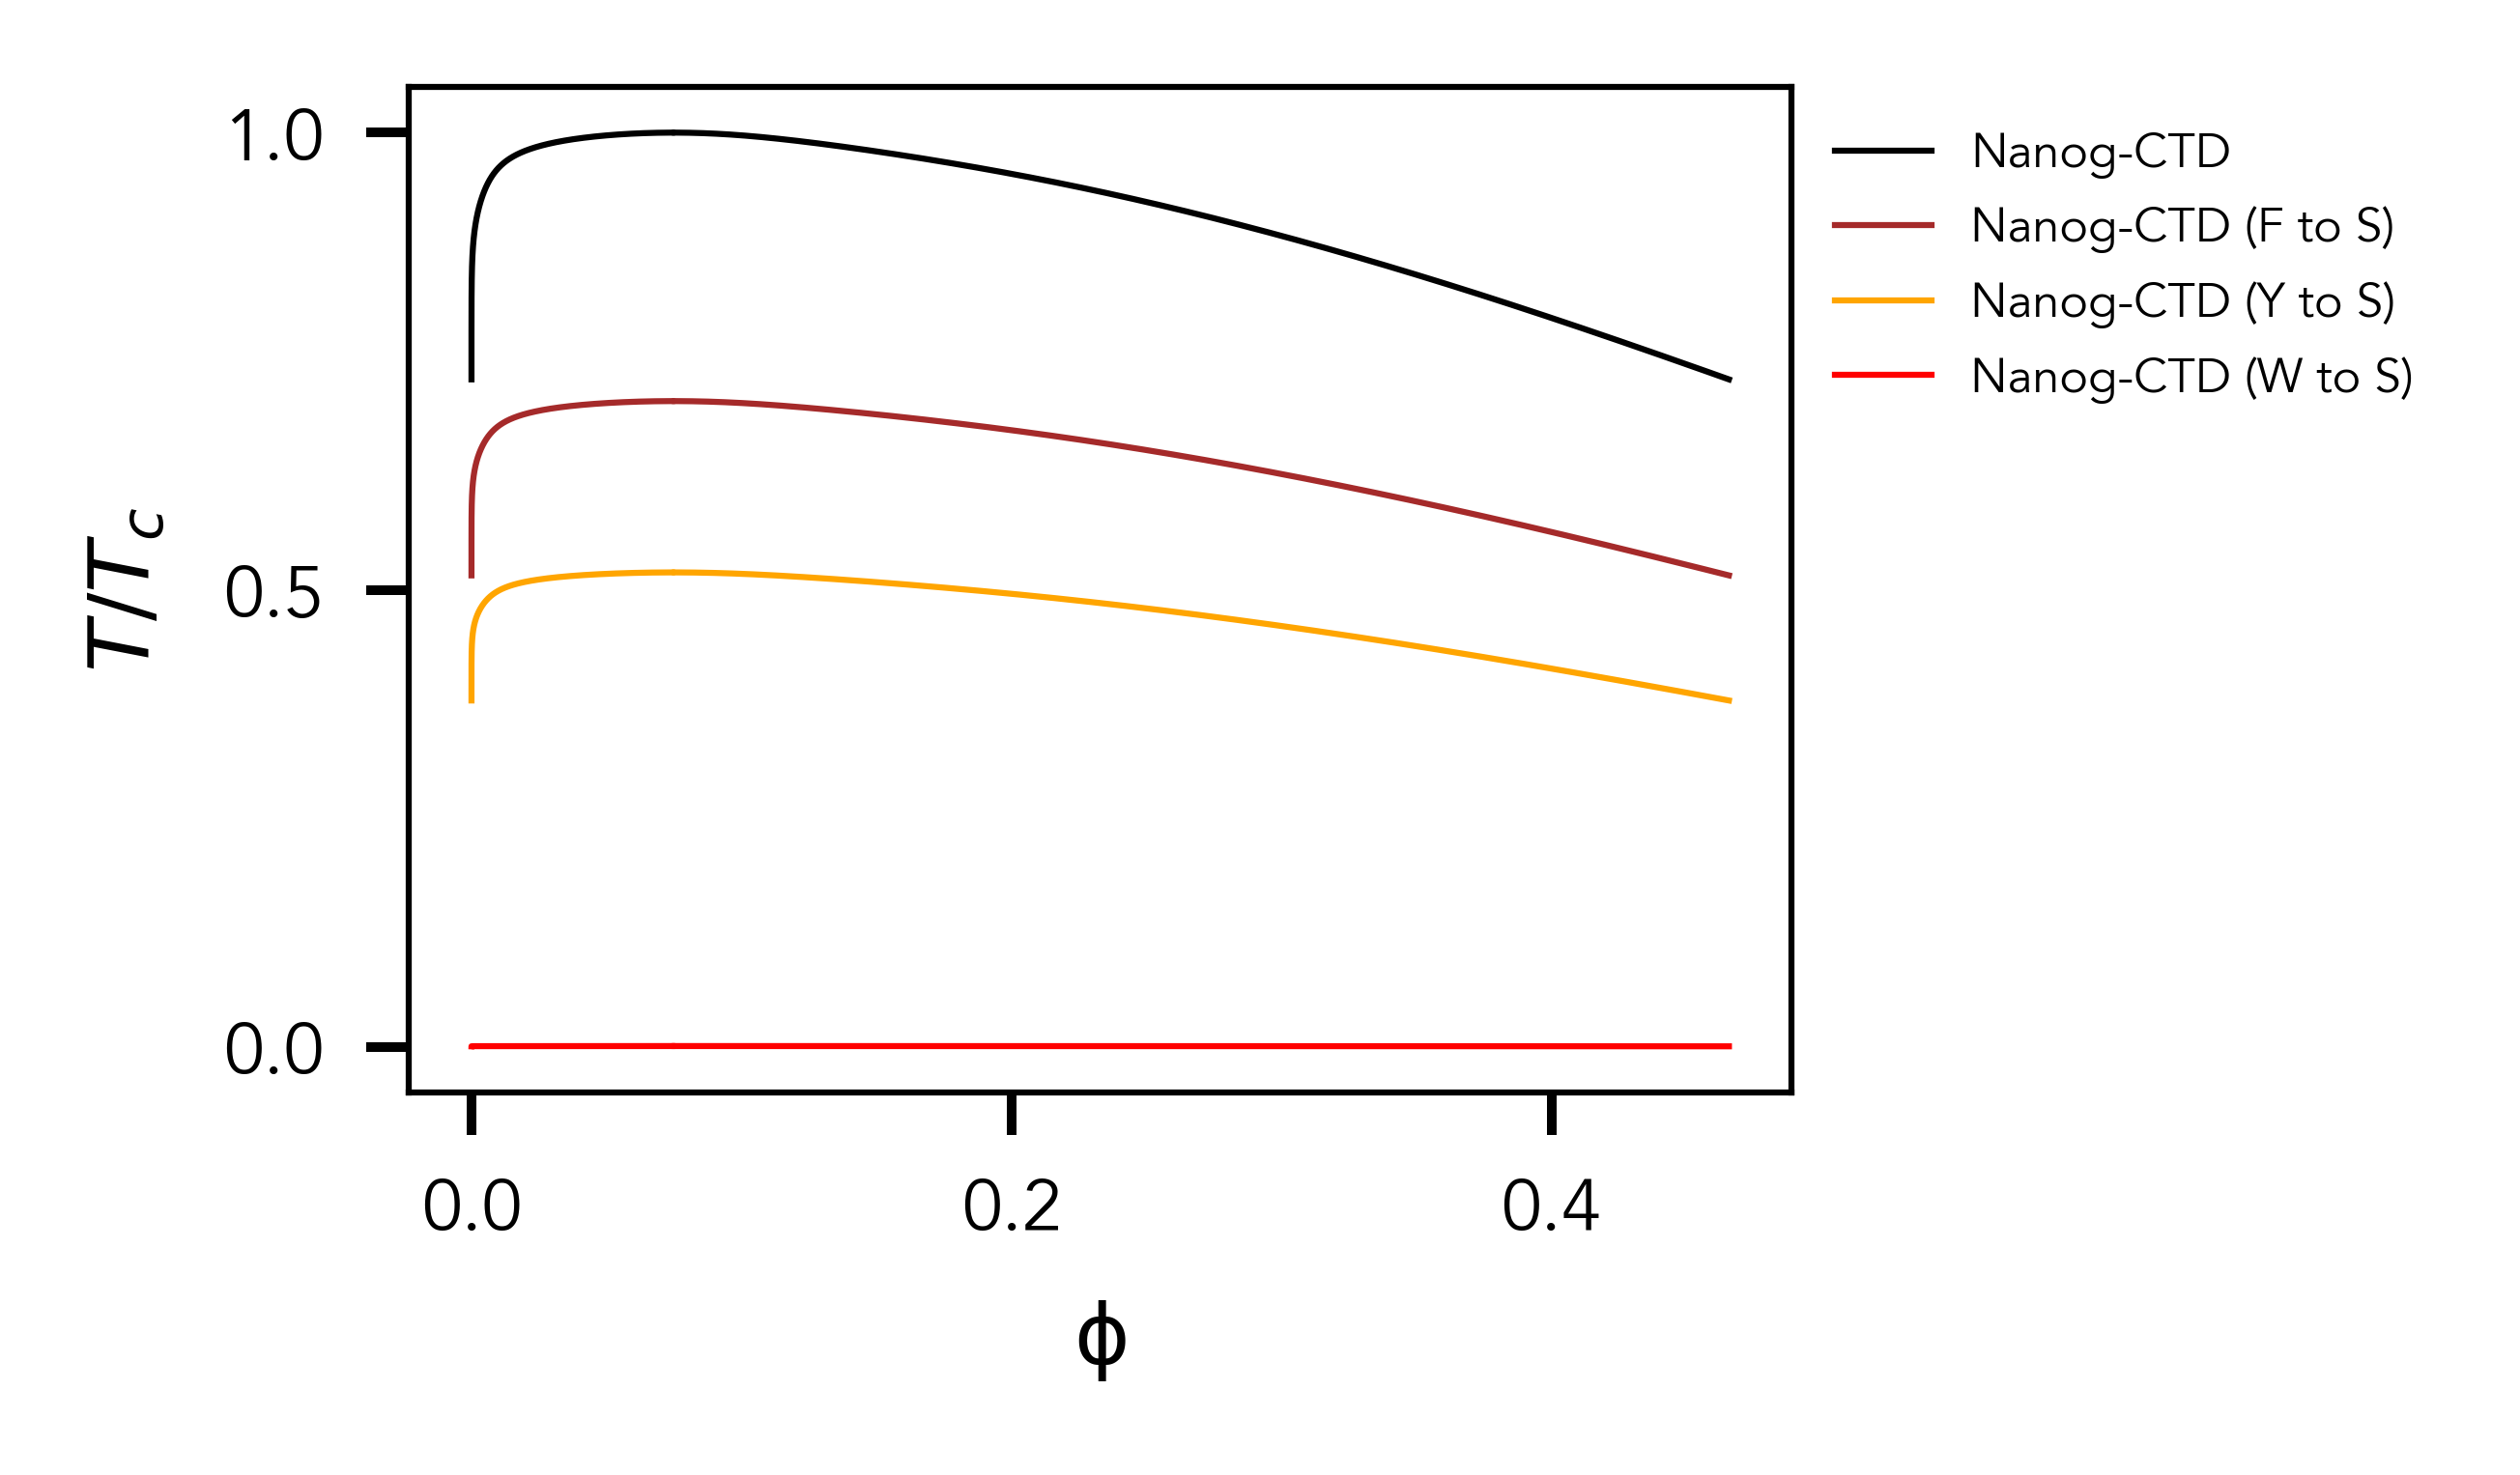

In [14]:
seqs = {}
seqs['Nanog-CTD'] = [nanog,'k']
seqs['Nanog-CTD (F to S)'] = [nanog.replace('F','S'),'brown']
seqs['Nanog-CTD (Y to S)'] = [nanog.replace('Y','S'),'orange']
seqs['Nanog-CTD (W to S)'] = [nanog.replace('W','S'),'r']





x =mf.plot_multiple_phase_diagrams(seqs,width=3, height=1.8, filename='out_figures/nanog_phase_diagram.pdf',tc_ref='Nanog-CTD')